# Data Challenge 1: Employee Retention
### The goal of this challange is to predict when employees are going to quit

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot

## Step 1: Import data

In [2]:
retention_data = pd.DataFrame.from_csv('employee_retention_data.csv')

### Data summary:
The table contains data on the 12 companies with an entry for each employee. Salary and seniority are the average value over the tenure of the employee at the company

In [3]:
retention_data.head(10)

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,
13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
927315.0,4,marketing,14,101000.0,2014-10-13,NaN
662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
88600.0,4,customer_service,21,107000.0,2013-10-21,NaN
716309.0,2,customer_service,4,30000.0,2014-03-05,NaN
172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23


## Step 2: Calculate headcount table
The prompt for this challange requested a table with the number of employees for each company for each date. The code below creates this table with two additional columns: mean company salary and mean company seniority.

In [4]:
#: Create DF without missing data and with the dates formated as datetimes
calc_headcount_df = retention_data.fillna('2015-12-20')
calc_headcount_df.join_date = calc_headcount_df.join_date.apply(pd.to_datetime)
calc_headcount_df.quit_date = calc_headcount_df.quit_date.apply(pd.to_datetime)

In [5]:
#: Create date range to iterate over as specified by the prompt
rng = np.arange('2011-01-24','2015-12-13', dtype='datetime64[D]')

In [13]:
#: Build up headcount table by date and company
headcount_df = pd.DataFrame()
for date in rng:
    joined_first = calc_headcount_df[calc_headcount_df.join_date.values < date]
    head_count = joined_first[joined_first.quit_date.values > date].groupby('company_id')
    i = 0
    for index, row in head_count.count().iterrows():
        headcount_df = headcount_df.append([[date, row['dept'], index, 
                                             head_count.seniority.mean().values[i],
                                             head_count.salary.mean().values[i],
                                            ]])
        i = i+1
        
    

In [17]:
headcount_df.columns = ['day', 'employee_headcount', 'company_id', 'mean_seniority', 'mean_salary']

In [18]:
headcount_df.head(10)

,day,employee_headcount,company_id,mean_seniority,mean_salary
0,2011-01-25,25,1,14.640000,148440.000000
0,2011-01-25,17,2,16.705882,178588.235294
0,2011-01-25,9,3,15.555556,180111.111111
0,2011-01-25,12,4,14.916667,136500.000000
0,2011-01-25,5,5,12.600000,111400.000000
0,2011-01-25,3,6,17.333333,129666.666667
0,2011-01-25,1,7,18.000000,249000.000000
0,2011-01-25,6,8,8.500000,93666.666667
0,2011-01-25,3,9,17.000000,95666.666667
0,2011-01-26,27,1,14.370370,143259.259259


In [19]:
headcount_df.to_csv('headcount_table.csv')

### Analyse the output of this table
Plot the employee headcount for each company to see if there is any major trends that can be predicted. As seen below, most compnanies 

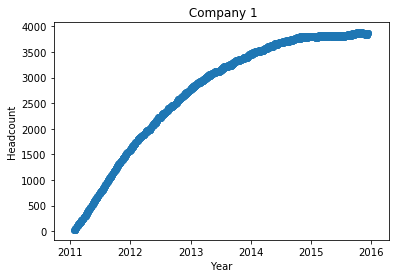

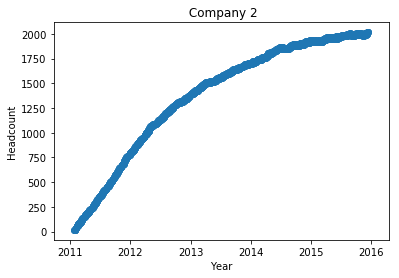

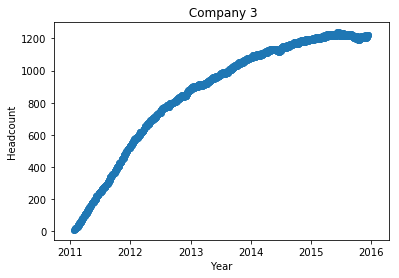

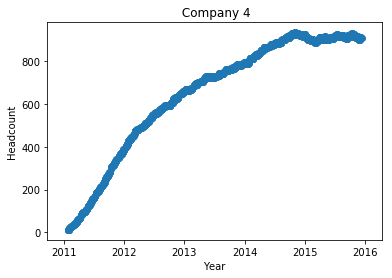

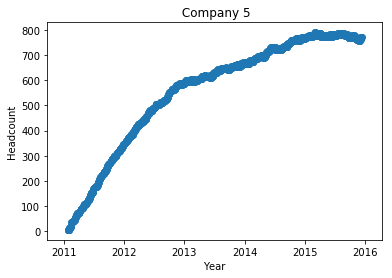

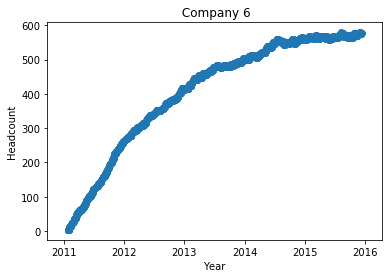

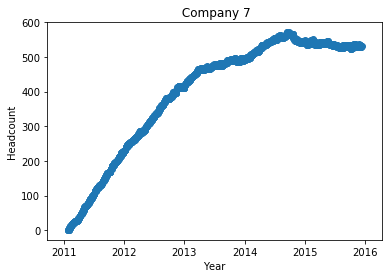

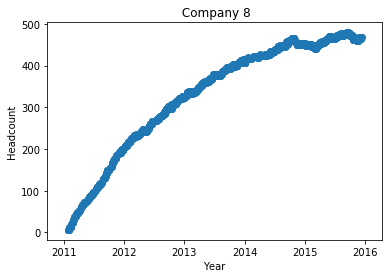

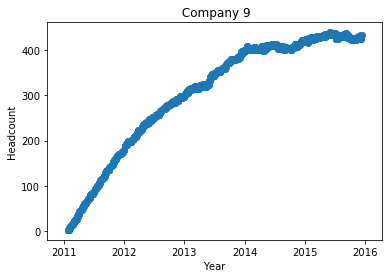

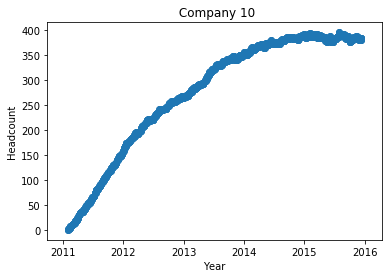

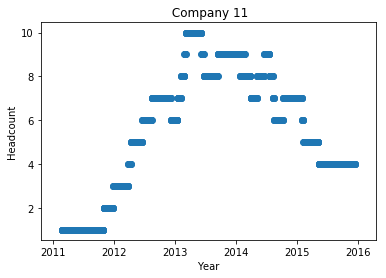

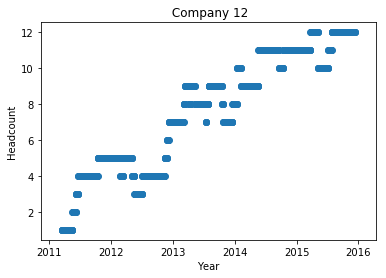

In [27]:
for c_id in pd.unique(headcount_df.company_id.values):
    plt.scatter(
        headcount_df[headcount_df.company_id == c_id].day.values, 
        headcount_df[headcount_df.company_id == c_id].employee_headcount.values
    )
    plt.title(' Company {}'.format(c_id))
    plt.xlabel('Year')
    plt.ylabel('Headcount')
    plt.show()

In [24]:
headcount_df.company_id == 1].day.values

/Users/natalieheer/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


ValueError: cannot reindex from a duplicate axis

## Analyze data from one company

In [29]:
#: Create new dataframe as platform for timeseries
company_df_1 = headcount_df[headcount_df.company_id == 12]
company_df_1.set_index("day", inplace=True)

In [31]:
company_df_1.head(10)

,employee_headcount,company_id,mean_seniority,mean_salary
day,,,,
2011-03-15,1,12,20.0,64000.0
2011-03-16,1,12,20.0,64000.0
2011-03-17,1,12,20.0,64000.0
2011-03-18,1,12,20.0,64000.0
2011-03-19,1,12,20.0,64000.0
2011-03-20,1,12,20.0,64000.0
2011-03-21,1,12,20.0,64000.0
2011-03-22,1,12,20.0,64000.0
2011-03-23,1,12,20.0,64000.0


In [33]:
ts = company_df_1.employee_headcount

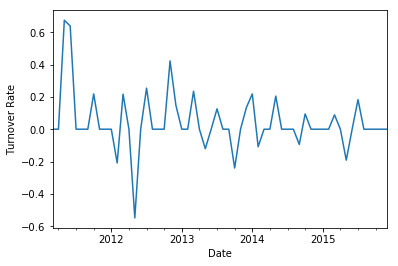

In [37]:
Turnover_rate = (ts.resample('M').last() - ts.resample('M').first()) / ts.resample('M').mean()
churn.plot()

plt.xlabel('Date')
plt.ylabel('Turnover Rate')
plt.show()

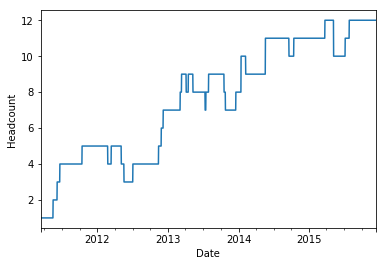

In [38]:
ts.plot()
plt.xlabel('Date')
plt.ylabel('Headcount')
plt.show()

/Users/natalieheer/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


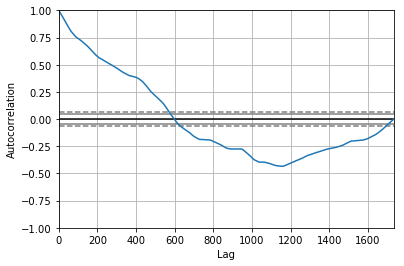

In [39]:
autocorrelation_plot(ts)
plt.show()

## Relational Data
To understand the factors involved in turnover, analyze tenure length at the company as a function of the other features in my dataset.

In [40]:
#: Convert dates to date format and calculate tenure
retention_data.join_date = retention_data.join_date.apply(pd.to_datetime)
retention_data.quit_date = retention_data.quit_date.apply(pd.to_datetime)
retention_data['tenure'] = retention_data.quit_date - retention_data.join_date

In [41]:
#: Check the output
retention_data.head(5)

,company_id,dept,seniority,salary,join_date,quit_date,tenure
employee_id,,,,,,,
13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


In [43]:
#: Check the max tenure to fill in appropriately tenure NaTs
max(retention_data.tenure)

Timedelta('1726 days 00:00:00')

In [44]:
#: Fill NaT values with 2000, higher than max makes it a visibly wrong number
retention_data.tenure.fillna(datetime.timedelta(days=2000), inplace=True)
retention_data.tenure = retention_data.tenure / np.timedelta64(1,'D')
retention_data.tenure = retention_data.tenure.astype(int)

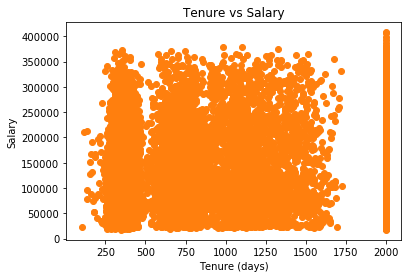

In [45]:
#: Check relationship between tenure and average salary
plt.scatter(retention_data.tenure, retention_data.salary)
plt.title('Tenure vs Salary')
plt.xlabel('Tenure (days)')
plt.ylabel('Salary')
plt.show()

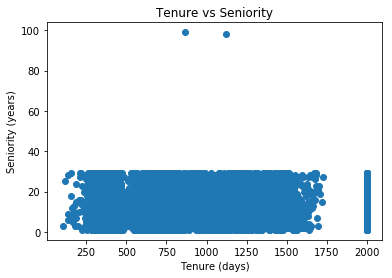

In [46]:
#: Check relationship between tenure and average seniority
plt.scatter(retention_data.tenure, retention_data.seniority)
plt.title('Tenure vs Seniority')
plt.xlabel('Tenure (days)')
plt.ylabel('Seniority (years)')
plt.show()

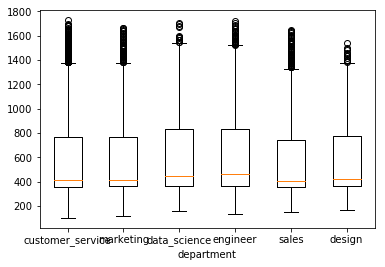

In [249]:
#: Check whether department affiliation 
data = [retention_data[np.logical_and(retention_data.dept == dept, \
                                      pd.notnull(retention_data.quit_date))].tenure.values\
    
        for dept in pd.unique(retention_data.dept.values)]

plt.boxplot(data, labels=pd.unique(retention_data.dept.values))
plt.xlabel('department')
plt.show()

## Conclusions: 
There doesn't seem to be any strong effect of salary, seniority or department on the length of tenure. There are a couple of outliers, in the senirity data, presumably no one has been working for close to 100 years. It seems like there is a concentration of points around the 1 year mark. Additionally it's possible that there are different relationships between these variables for different companies, so I will generate the same plots, but on a per company basis.

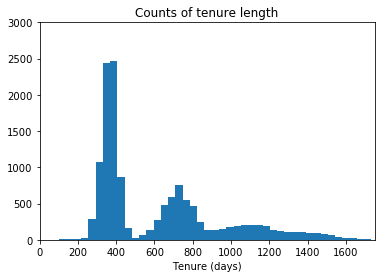

In [51]:
#: Histogram of tenure lengths show that people are most likely to quit/leave after 1 year.
plt.hist(retention_data.tenure.values, bins=50)
plt.title('Counts of tenure length')
plt.xlim(0, 1750) #: Rescale to not plot artificial values
plt.ylim(0, 3000)
plt.xlabel('Tenure (days)')
plt.show()

## Analysis by company:
relationship between salary, seniority and tenure for each company, and each department

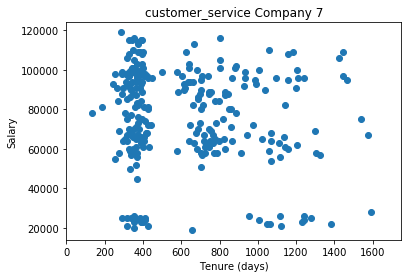

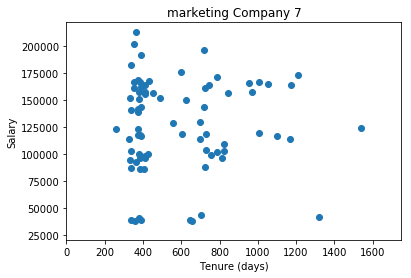

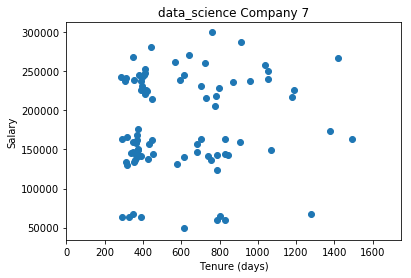

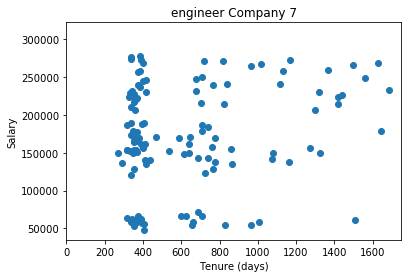

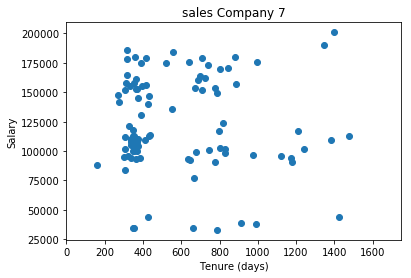

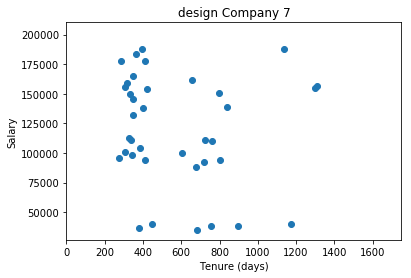

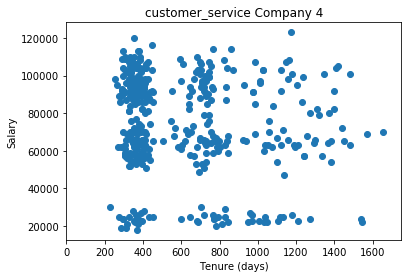

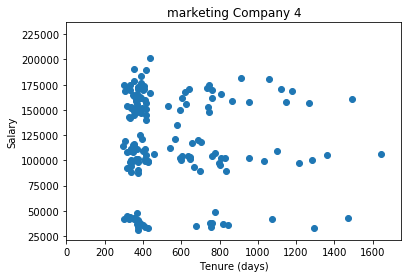

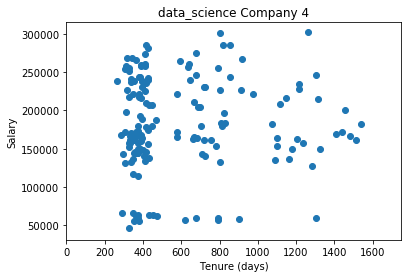

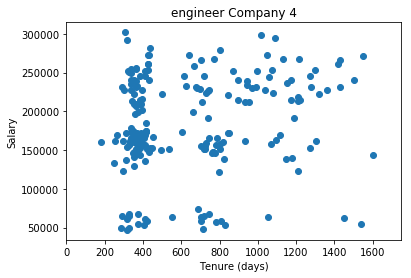

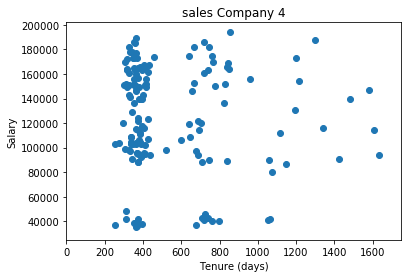

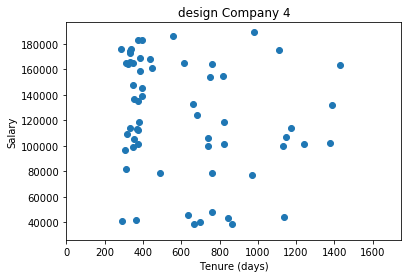

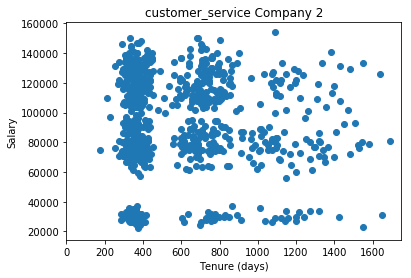

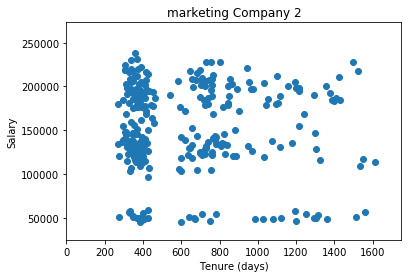

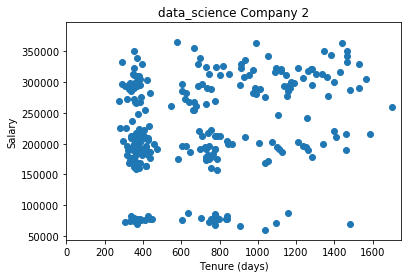

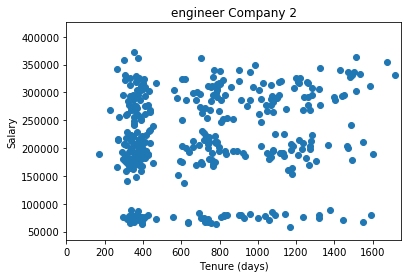

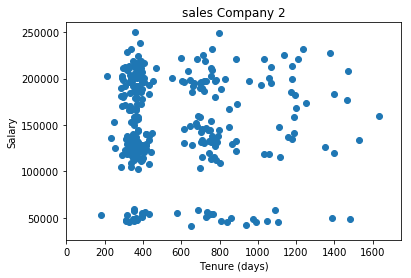

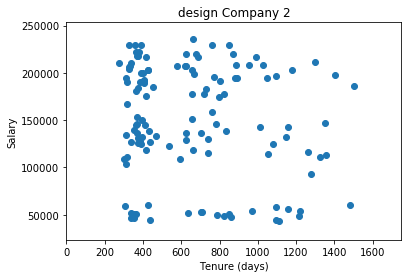

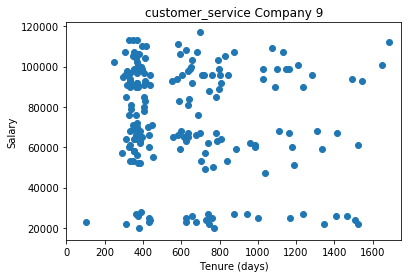

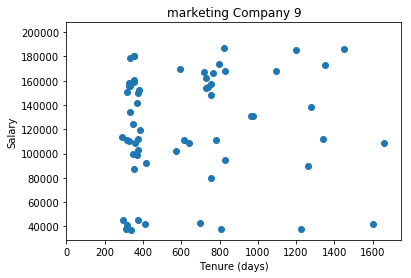

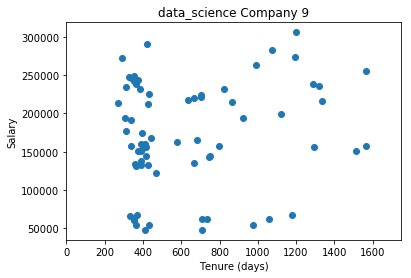

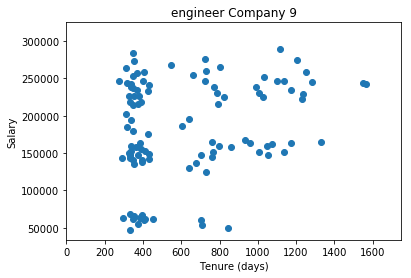

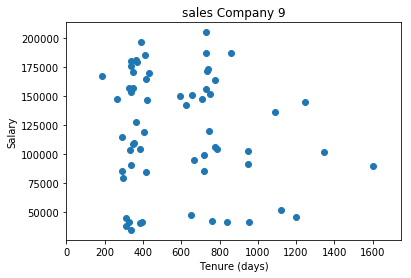

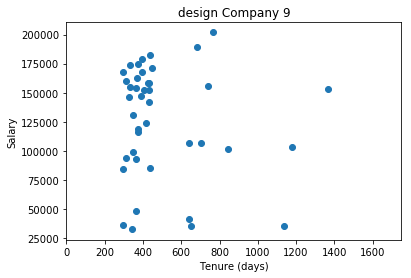

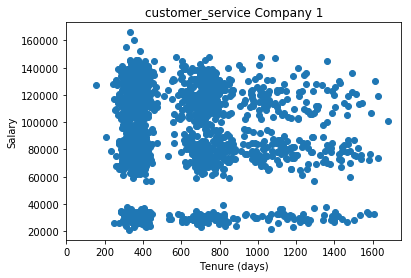

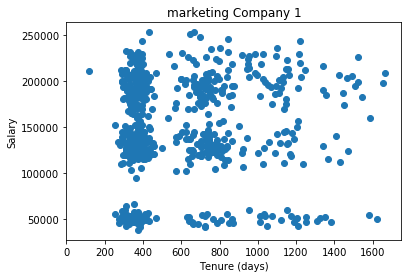

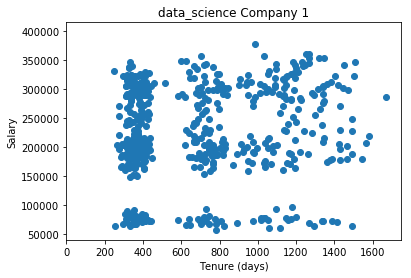

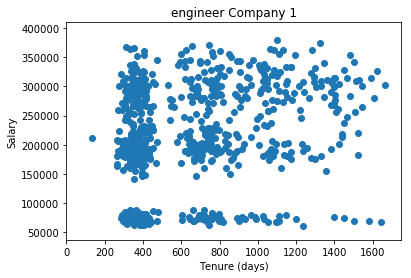

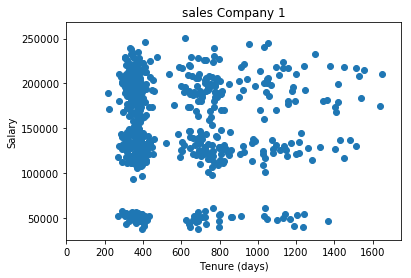

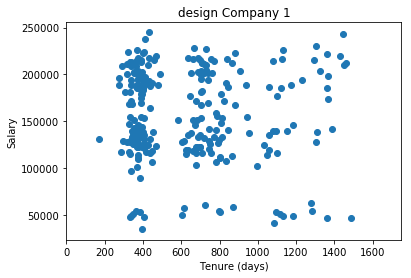

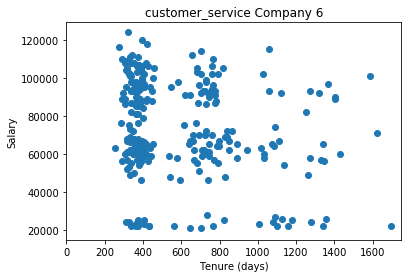

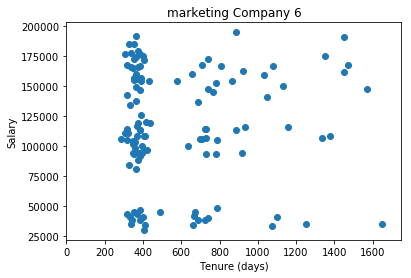

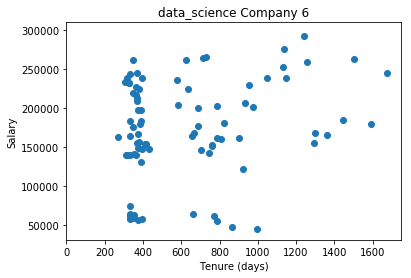

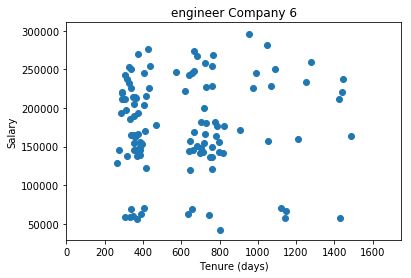

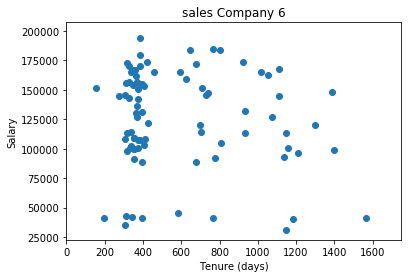

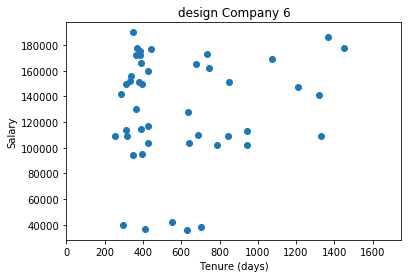

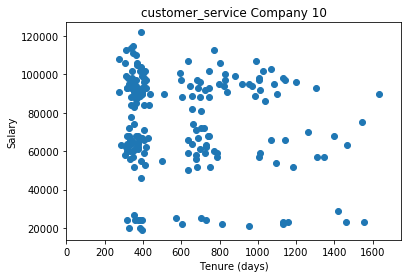

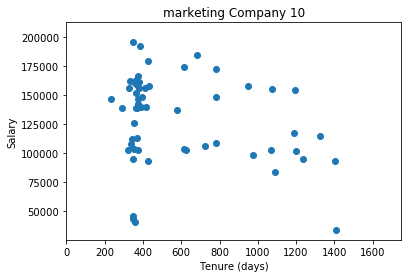

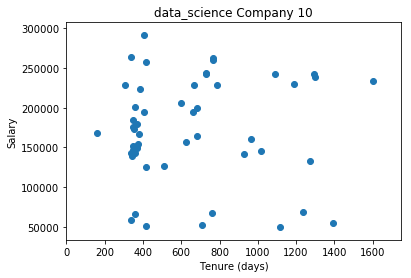

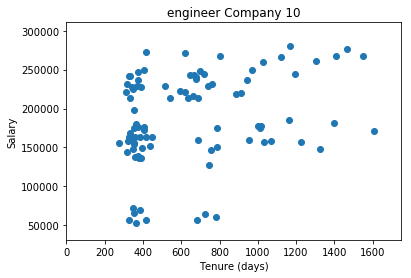

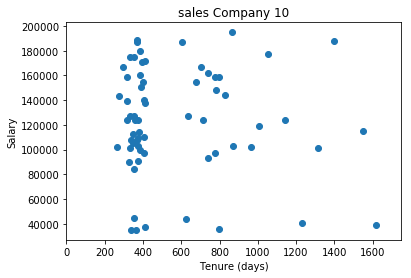

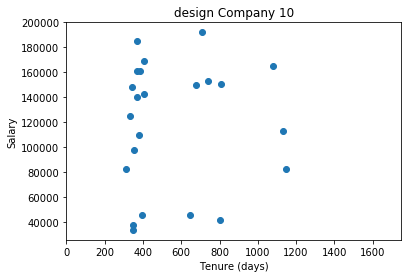

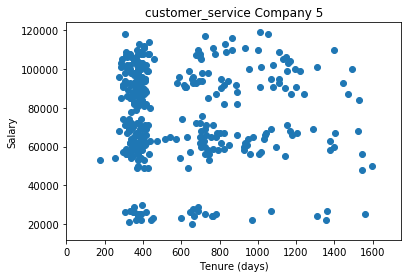

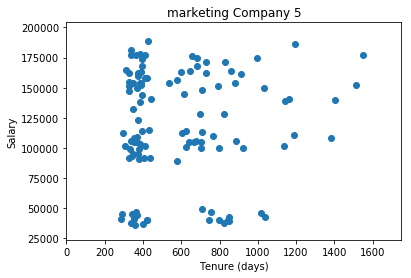

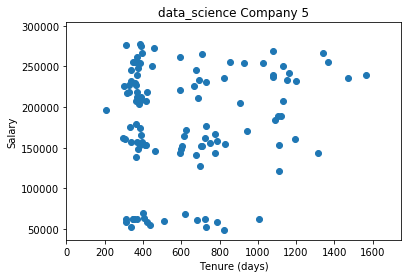

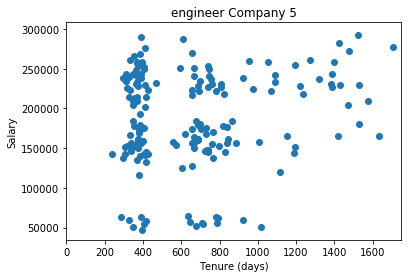

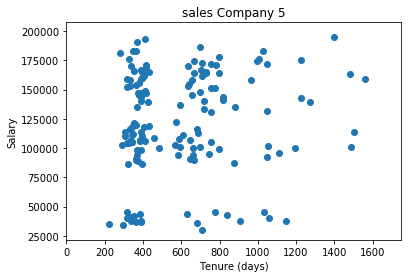

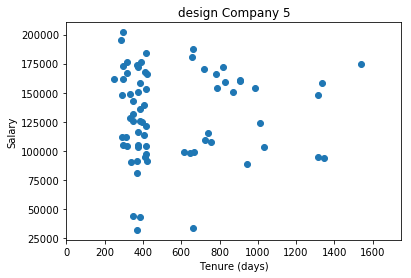

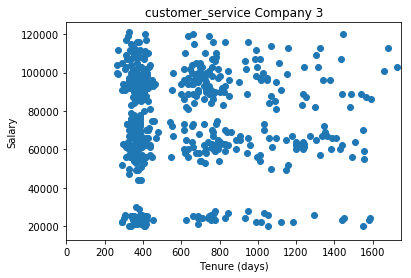

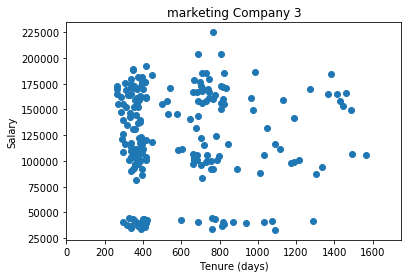

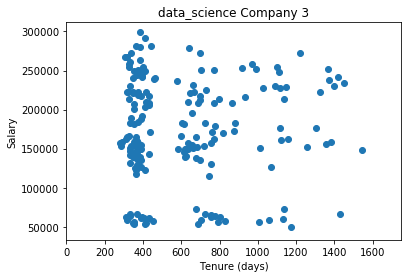

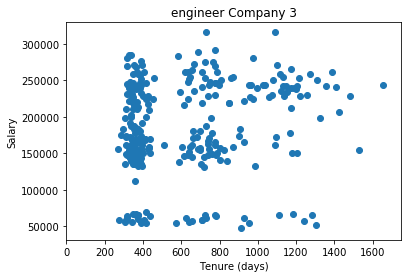

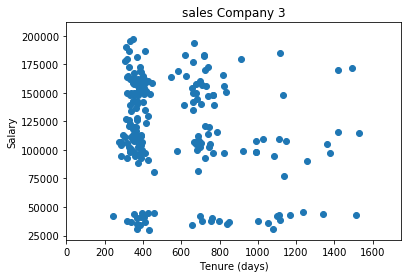

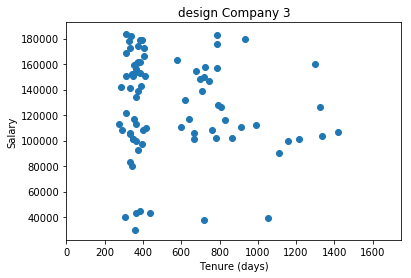

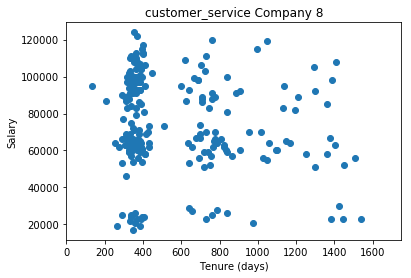

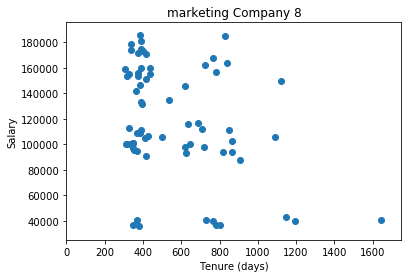

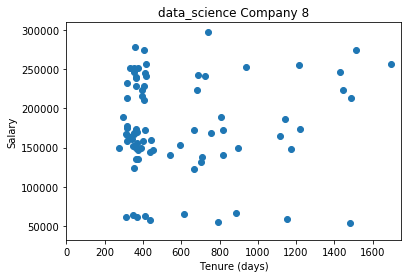

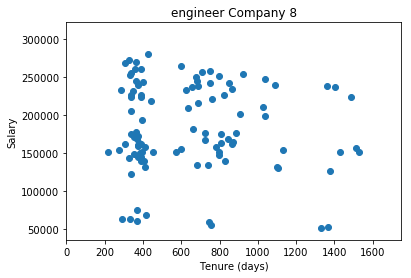

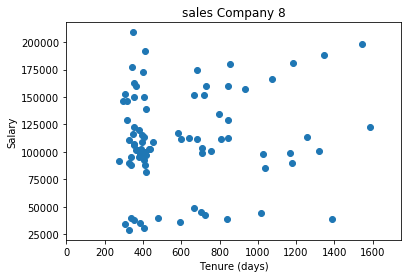

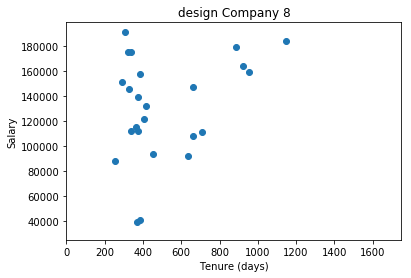

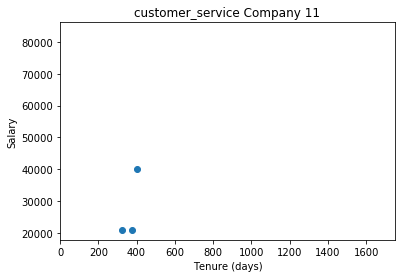

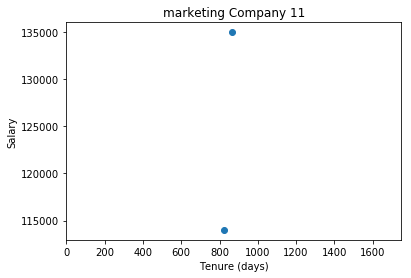

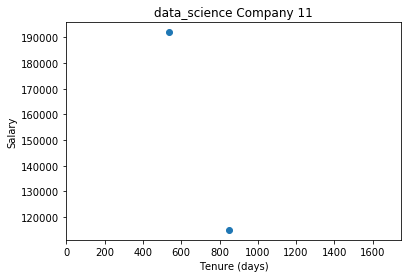

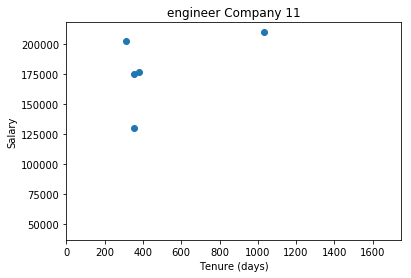

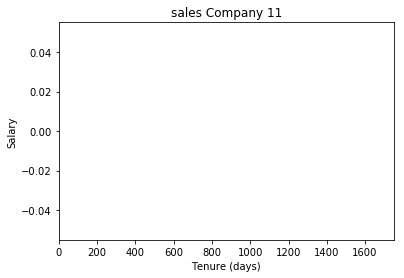

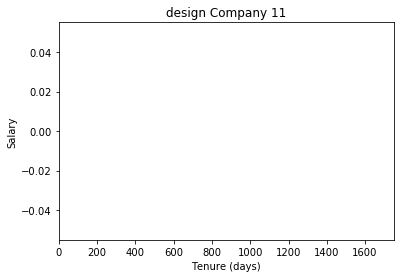

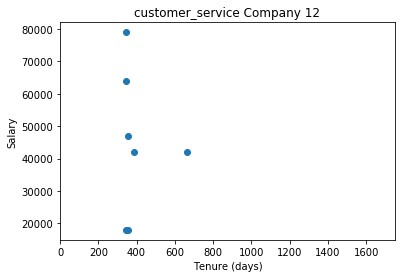

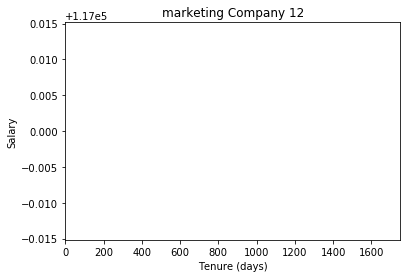

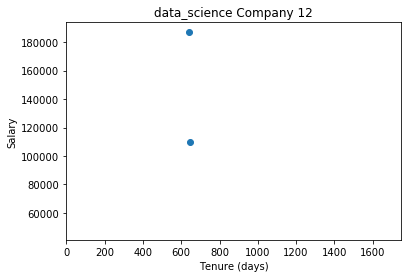

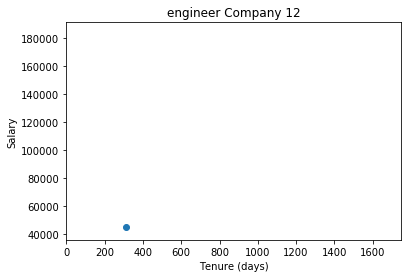

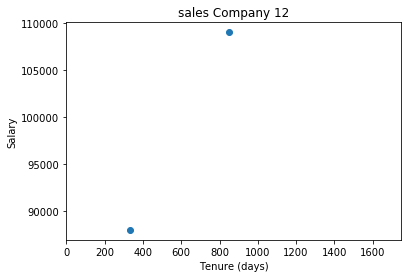

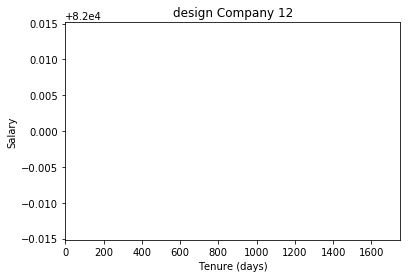

In [52]:
#: Tenure vs Salary
for c_id in pd.unique(retention_data.company_id.values):
    for d in pd.unique(retention_data.dept.values):
        plt.scatter(
            retention_data[
                np.logical_and(retention_data.company_id == c_id, retention_data.dept == d)
            ].tenure.values, 
            retention_data[
                np.logical_and(retention_data.company_id == c_id, retention_data.dept == d)
            ].salary.values
        )
        plt.title(d + ' Company {}'.format(c_id))
        plt.xlim(0, 1750) #: Rescale to not plot artificial values
        plt.xlabel('Tenure (days)')
        plt.ylabel('Salary')
        plt.show()

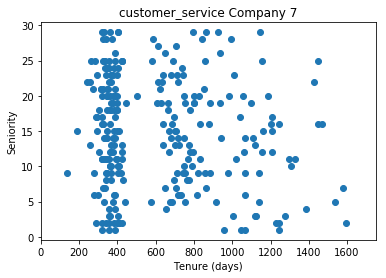

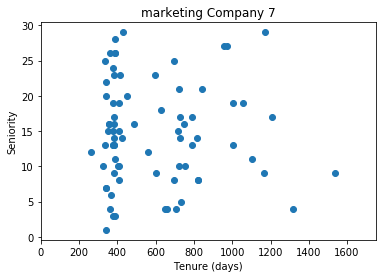

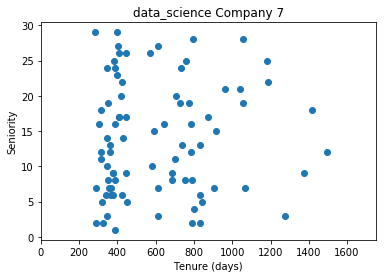

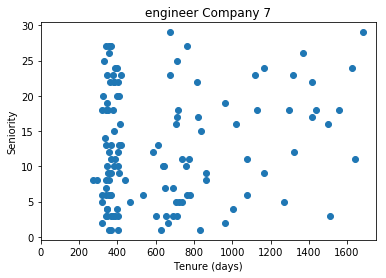

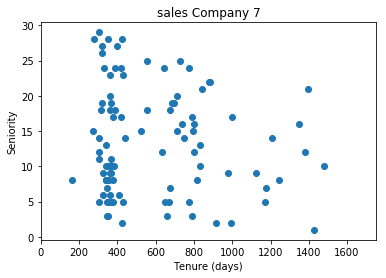

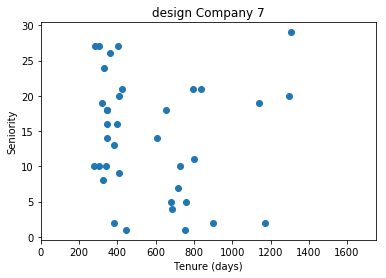

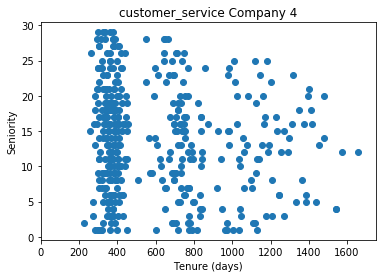

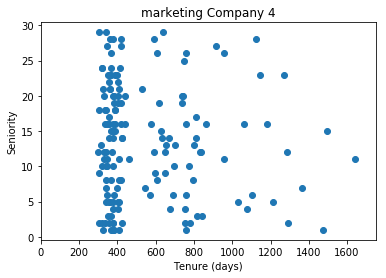

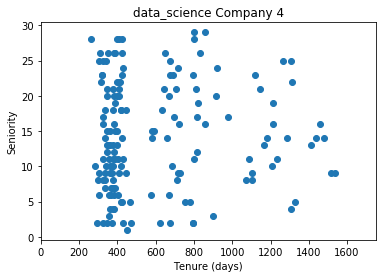

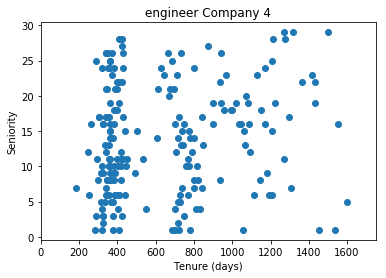

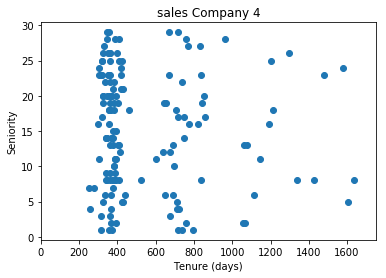

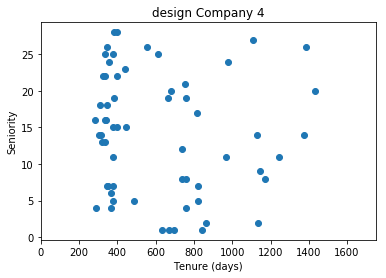

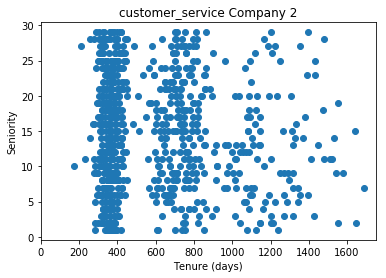

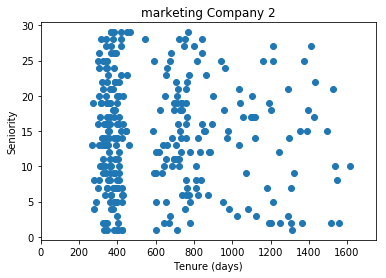

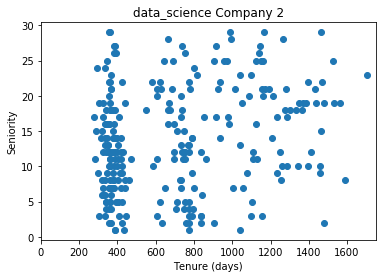

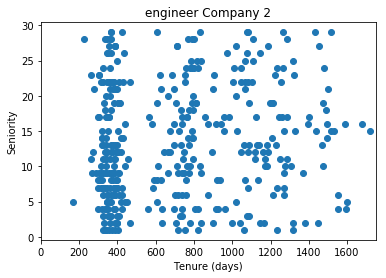

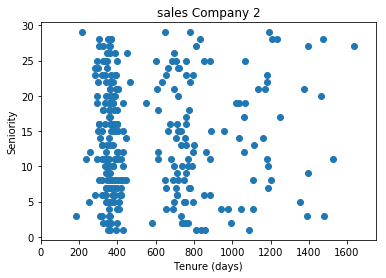

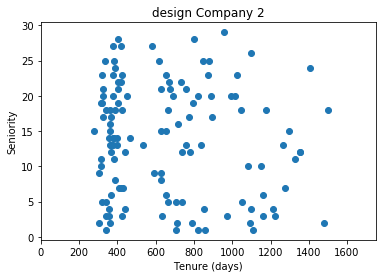

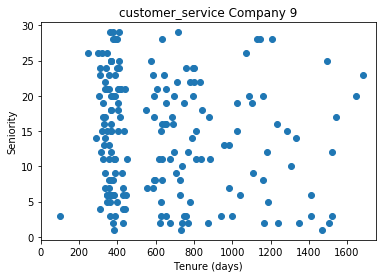

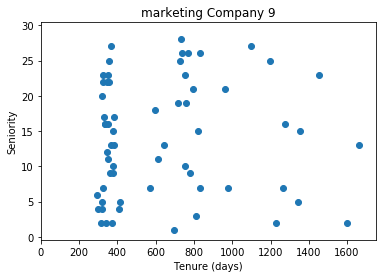

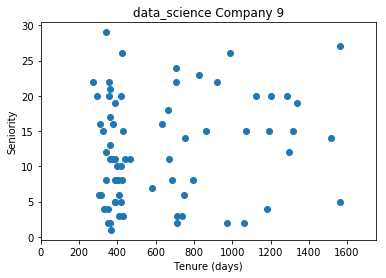

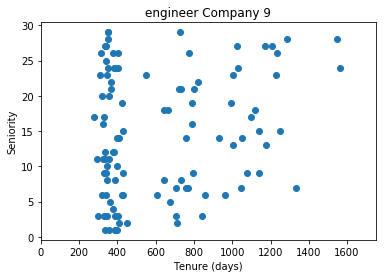

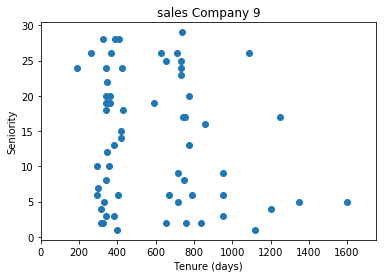

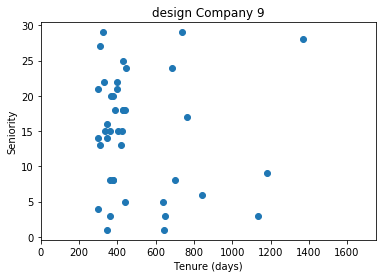

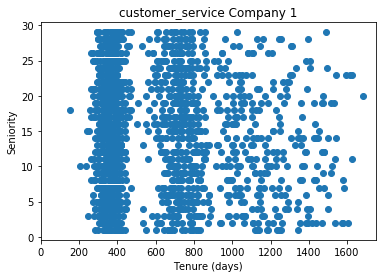

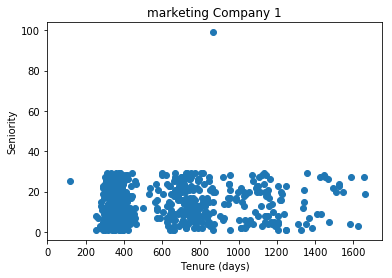

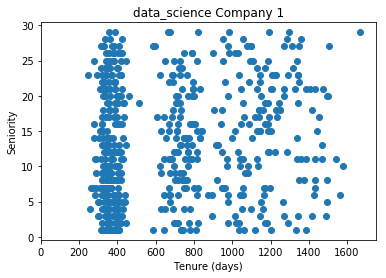

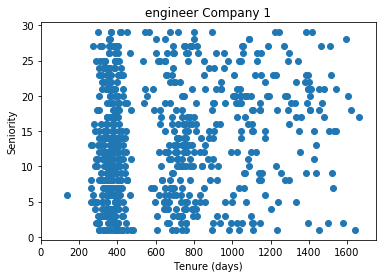

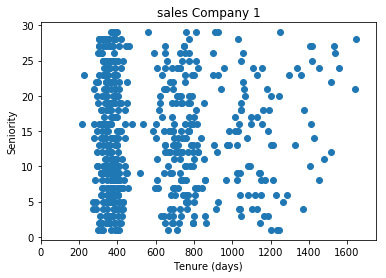

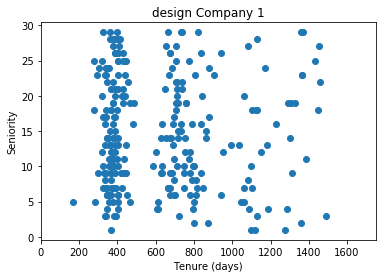

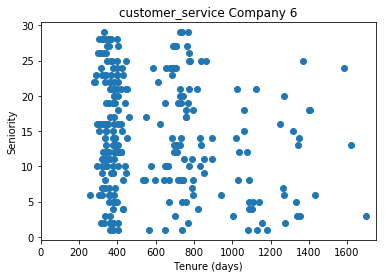

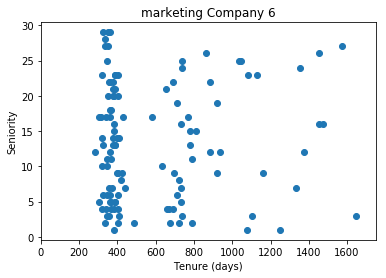

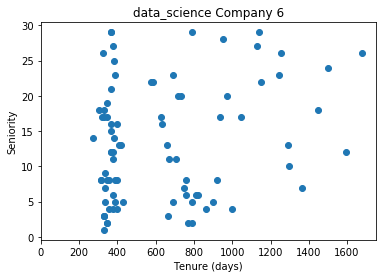

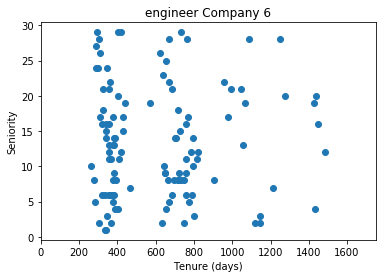

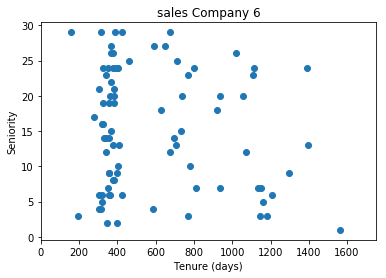

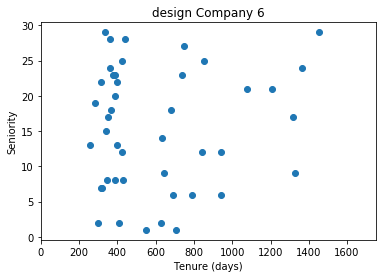

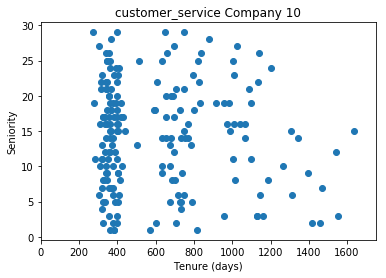

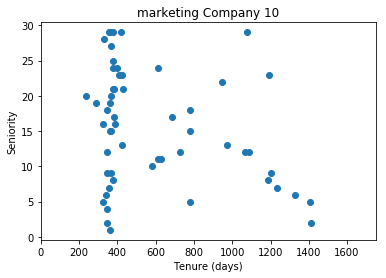

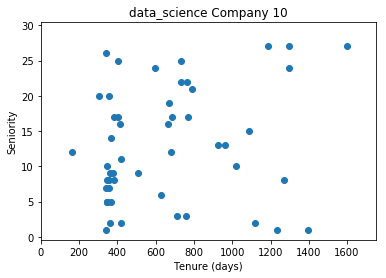

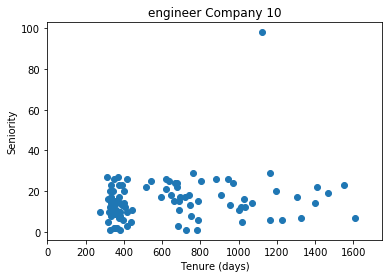

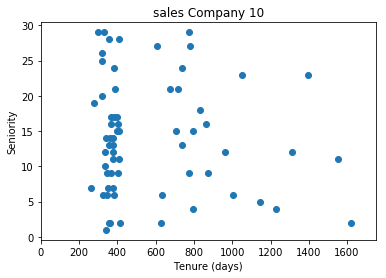

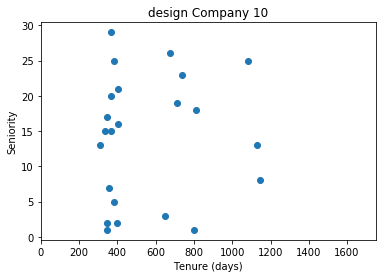

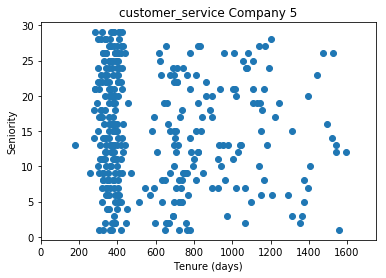

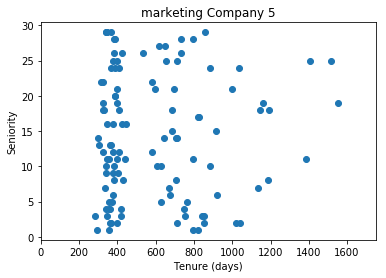

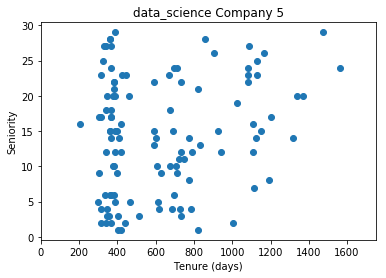

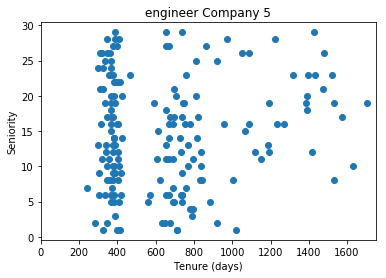

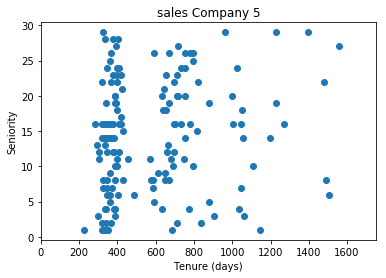

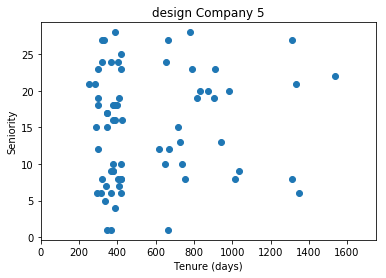

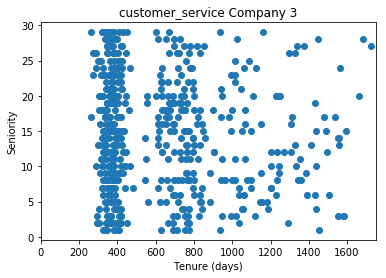

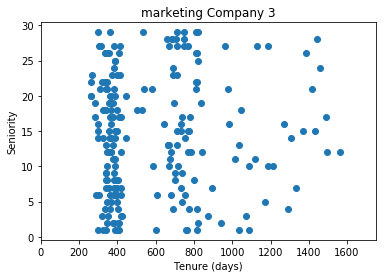

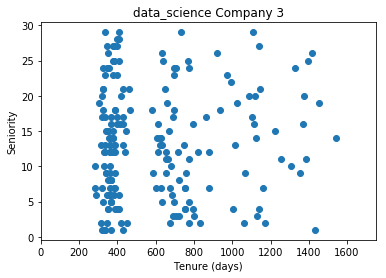

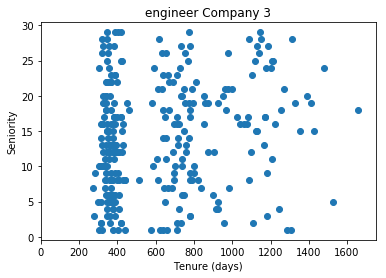

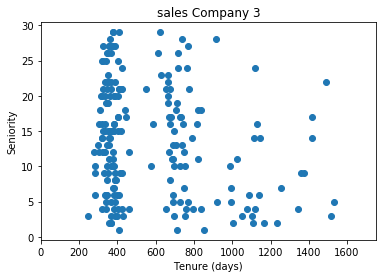

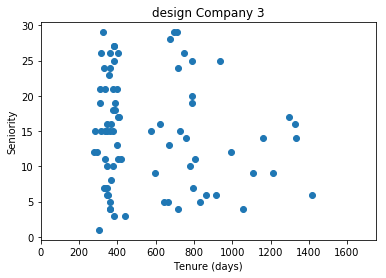

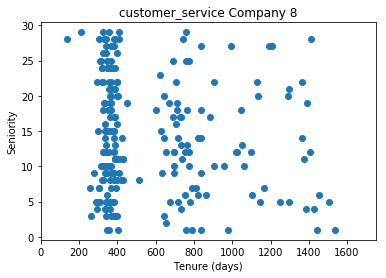

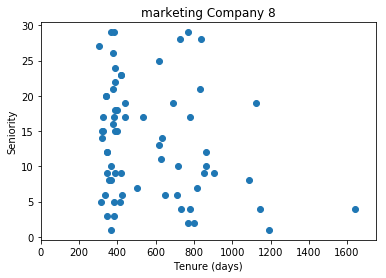

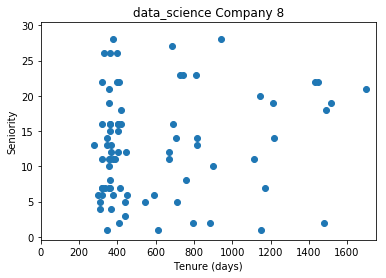

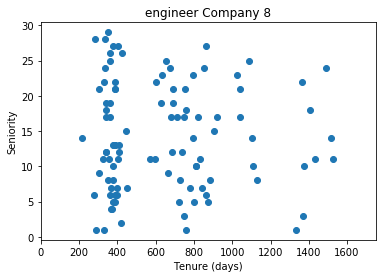

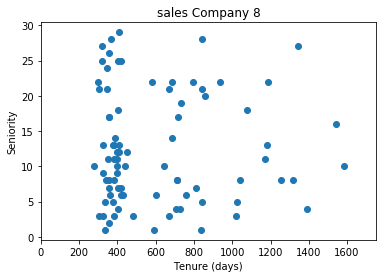

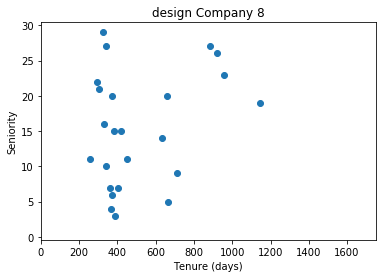

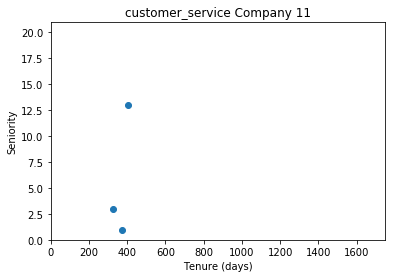

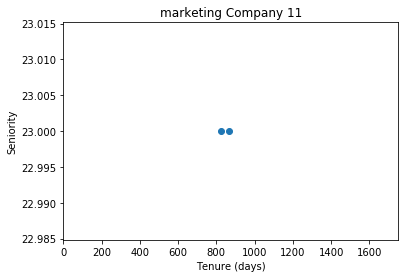

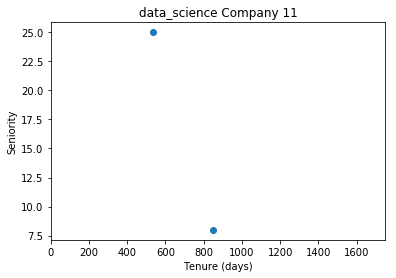

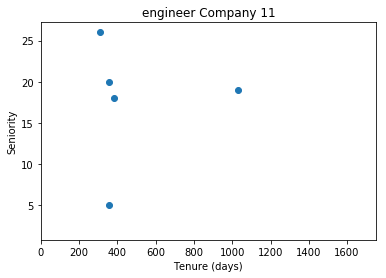

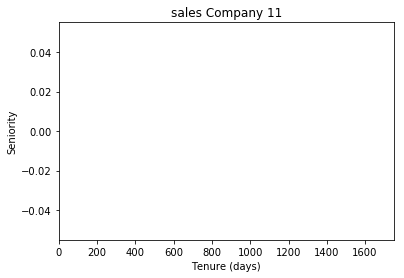

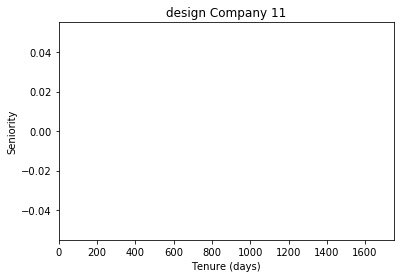

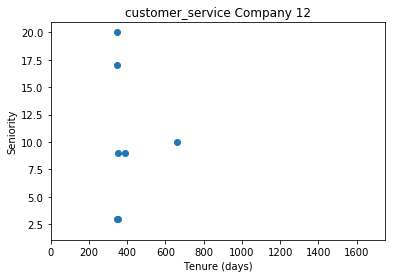

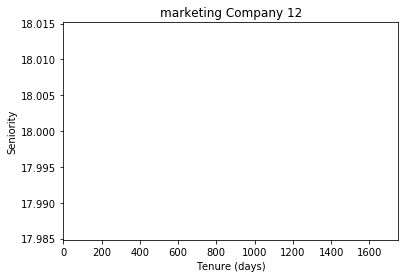

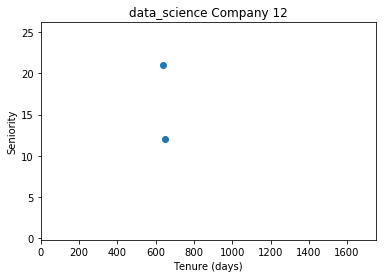

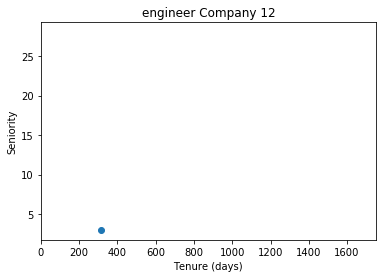

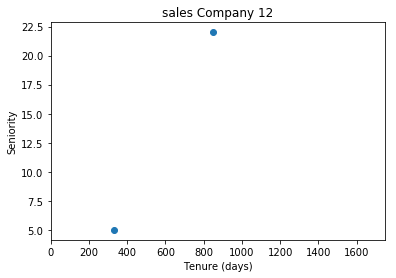

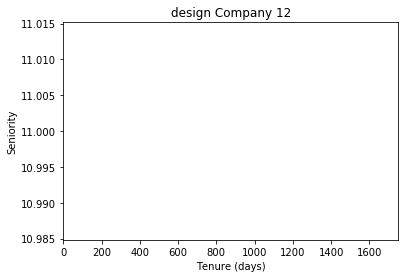

In [53]:
for c_id in pd.unique(retention_data.company_id.values):
    for d in pd.unique(retention_data.dept.values):
        plt.scatter(
            retention_data[
                np.logical_and(retention_data.company_id == c_id, retention_data.dept == d)
            ].tenure.values, 
            retention_data[
                np.logical_and(retention_data.company_id == c_id, retention_data.dept == d)
            ].seniority.values
        )
        plt.title(d + ' Company {}'.format(c_id))
        plt.xlim(0, 1750) #: Rescale to not plot artificial values
        plt.xlabel('Tenure (days)')
        plt.ylabel('Seniority')
        plt.show()

## Final Conclusions:
There does not seem to be a strong correlation between either salary or seniority with tenure even when broken down by department. The strongest predictor would most likely be current tenure length because there is a strong yearly periodicity to when people leave the company. I would conclude that if the companies want to keep employees that they provide positive reinforcement right before the year mark. This periodicity might also be because the company has a tendancy to fire people at the year mark, so they could also try to optimize onboarding costs based on that knowledge.